# Project 2 - Ames Housing Data and Kaggle Challenge

## Part 1 - EDA and Cleaning

1. Import Libraries
2. Set Display Range
3. Load Data
4. Reformat the DataFrame Columns
5. Check Mismatched Datatypes
6. Check Missing Values
7. Check Data that is in Training but not Testing Dataset
8. Data Cleaning - Training Dataset
9. Plots
10. Data Transformation Proposal
11. Store Cleaned Data for Part 2




### 1.1 Import Libraries

In [104]:
# Import numpy and pandas libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1.2 Set Display Range

In [105]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 1.3 Load Data

In [106]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

In [107]:
# Check the first 5 lines
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [108]:
# Check the shape of the training data
df_train.shape

(2051, 81)

In [109]:
# Review the first 5 lines
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [110]:
# Review the top 5 lines of the data
df_test.shape

(879, 80)

### 1.4 Reformat the DataFrame Columns

#### 1.4.1 **Function** for Column Reformat 

In [111]:
# 1. Function for re-format DataFrame Columns
'''This function converts:
   1. letters to all lower case, and
   2. space and special characters to underscore
   input:   DataFrame
   returns: DataFrame (same name)
   '''
def format_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('/','_').str.replace('(','').str.replace(')','')   
    return df

#### 1.4.2 Reformat the Training Dataset Columns 

In [112]:
# Use function to reformat the training dataset columns
df_train = format_columns(df_train)

In [113]:
df_train.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


#### 1.4.3 Reformat the Testing Dataset Columns

In [114]:
# Reformat the testing dataset columns
df_test = format_columns(df_test)

In [115]:
df_test.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New


### 1.5 Check Mismatched Datatypes
> No datatype mismatch

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod_add     2051 non-null int64
roof_style         20

> No datatype mismatch

### 1.6 Check Missing Values

> Training data missing data summary and suggested actions

**Index**|**Fture**|**Missing Value**|**%**|**Note**|**Action**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
4|lot\_frontage|330|16.09|No Value|ignore feature
7|alley|1911|93.17|no alley access|n.a.
26|mas\_vnr\_type|22|1.07|missing Value|ignore feature
27|mas\_vnr\_area|22|1.07|missing Value|ignore feature
31|bsmt\_qual|55|2.68|no basement|n.a.
32|bsmt\_cond|55|2.68|no basement|n.a.
33|bsmt\_exposure|58|2.83|55 no basement, 3 missing values, id: 1797, 67, 2780|delete: 1797, 67, 2780
34|bsmtfin\_type\_1|55|2.68|no basement|n.a.
35|bsmtfin\_sf\_1|1|0.05|id: 1342, no basement, should be 0|correct to 0
36|bsmtfin\_type\_2|56|2.73|55 no basement, 1 missing value (id. 445)|delete: 445
37|bsmtfin\_sf\_2|1|0.05|id: 1342, no basement, should be 0 |correct to 0
38|bsmt\_unf\_sf|1|0.05|id: 1342, no basement, should be 0|correct to 0
39|total\_bsmt\_sf|1|0.05|id: 1342, no basement, should be 0|correct to 0
48|bsmt\_full\_bath|2|0.1|id: 1342 & 1498, no basement, should be 0|correct to 0
49|bsmt\_half\_bath|2|0.1|id: 1342 & 1498, no basement, should be 0|correct to 0
58|fireplace\_qu|1000|48.76|no fireplaces|n.a.
59|garage\_type|113|5.51|no garage|n.a.
60|garage\_yr\_blt|114|5.56|113 no garage, 1 missing value, id: 2237|delete: 2237
61|garage\_finish|114|5.56|113 no garage, 1 missing value, id: 2237|delete: 2237
62|garage\_cars|1|0.05|id: 2237, missing value|delete: 2237
63|garage\_area|1|0.05|id: 2237, missing value|delete: 2237
64|garage\_qual|114|5.56|113 no garage, 1 missing value, id: 2237|delete: 2237
65|garage\_cond|114|5.56|113 no garage, 1 missing value, id: 2237|delete: 2237
73|pool\_qc|2042|99.56|no pool|n.a.
74|fence|1651|80.5|no fense|n.a.
75|misc\_feature|1986|96.83|no misc feature|n.a.

> Testing data missing data Summary and suggested action to the training data


**Index**|**Feature**|**Missing Value**|**%**|**Note**|**Action**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
4|lot\_frontage|160|18.2|missing Value|ignore feature
7|alley|821|93.4|no alley access|n.a.
26|mas\_vnr\_type|1|0.11|missing Value|ignore feature
27|mas\_vnr\_area|1|0.11|missing Value|ignore feature
31|bsmt\_qual|25|2.84|no basement|n.a.
32|bsmt\_cond|25|2.84|no basement|n.a.
33|bsmt\_exposure|25|2.84|no basement|n.a.
34|bsmtfin\_type\_1|25|2.84|no basement|n.a.
36|bsmtfin\_type\_2|25|2.84|no basement|n.a.
43|electrical|1|0.11|missing Value|ignore feature
58|fireplace\_qu|422|48.01|no fireplace|n.a.
59|garage\_type|44|5.01|no garage|n.a.
60|garage\_yr\_blt|45|5.12|44 no garage, 1 missing value, id: 1357|ignore feature
61|garage\_finish|45|5.12|44 no garage, 1 missing value, id: 1357|ignore feature
64|garage\_qual|45|5.12|44 no garage, 1 missing value, id: 1357|ignore feature
65|garage\_cond|45|5.12|44 no garage, 1 missing value, id: 1357|ignore feature
73|pool\_qc|875|99.54|no pool|n.a.
74|fence|707|80.43|no fence|n.a.
75|misc\_feature|838|95.34|no misc feature|n.a.

> Action Summary:
1. delete: 1798, 76, 2780, 445, 2237
2. ignore: 'lot_frontage', 'mas_vnr_type', 'mas_vnr_area', 'electrical', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond'

In [117]:
# Function for creating missing value DF
'''Return a Dataframe of feature with non-zero numbers of missing values
   input: DataFrame
   outputL DataFrame
   '''
def miss_val(df):
    df_miss = df.isna().sum().reset_index()
    df_miss.columns = ['feature','miss_value']
    df_miss['percent'] = round(df_miss['miss_value'] / df.shape[0] * 100, 2)
    df_miss = df_miss[df_miss['miss_value'] != 0]
    return df_miss

In [118]:
# Run function to find the missing value in the training data
df_train_miss_val = miss_val(df_train)

In [119]:
# Display the missing value in the training data
df_train_miss_val

,feature,miss_value,percent
4,lot_frontage,330,16.09
7,alley,1911,93.17
26,mas_vnr_type,22,1.07
27,mas_vnr_area,22,1.07
31,bsmt_qual,55,2.68
32,bsmt_cond,55,2.68
33,bsmt_exposure,58,2.83
34,bsmtfin_type_1,55,2.68
35,bsmtfin_sf_1,1,0.05
36,bsmtfin_type_2,56,2.73


Performed .unique(), .sort_values() and other data check methods. See table summarizing the missing data and suggested action at the beginning of this sub-section.

In [120]:
df_test_miss_val = miss_val(df_test)
df_test_miss_val

,feature,miss_value,percent
4,lot_frontage,160,18.20
7,alley,821,93.40
26,mas_vnr_type,1,0.11
27,mas_vnr_area,1,0.11
31,bsmt_qual,25,2.84
32,bsmt_cond,25,2.84
33,bsmt_exposure,25,2.84
34,bsmtfin_type_1,25,2.84
36,bsmtfin_type_2,25,2.84
43,electrical,1,0.11


### 1.7 Check Data that is in Training but not Testing Dataset

> Cross Data Check Result and Action Summary

**Feature**|**In Train Only**|**In Test Only**|**Action**
:-----:|:-----:|:-----:|:-----:
ms\_zonging|A (agr)|--|Delete A (agr\_) from Train
utilities|NoSewa|--|Combined Dummy
neightborhood|GrnHill, Landmrk|--|Combined Dummy / Delete from Train
condition\_2|RRNn, Artery, RRAe, RRAn|--|Combined Dummy
roof\_matl|Membran, ClyTile|Metal, Roll|Combined Dummy
exterior\_1st|Stone, Cblock, ImStucc|PreCast|Combined Dummy
exterior\_2nd|Stone|PreCast, Other|Combined Dummy
bsmt\_cond|Po, Ex|--|Combined Dummy
heating|Wall, OthW|Floor|Combined Dummy
heating\_qc|Po|--|Combined Dummy
electrical|Mix|--|Combined Dummy
kitchen\_qual|--|Po|Combined Dummy
functional|Sev, Sal|--|Combined Dummy
garage\_qual|Ex|--|Combined Dummy
pool\_qc|Fa, Gd|--|Combined Dummy
mis\_feature|TenC, Elev|--|Combined Dummy
sale\_type|--|VWD|Combined Dummy

> Action Summary
1. Delete: Data in 'A(arg_)' zoning from ('ms_zoning'). - irrelevant to testing data.
2. Possible to Delete: Data in 'GmHill' and 'Landmrk'('neighborhood'). - irrelevant to testing data.

In [121]:
# 2. Function to compare categorical columns between the training and testing datasets 
# purpose is to eliminate irrelevant values from the training data
'''Return a list of value in df_1 but not in df_2
   input:
     f(feature): str
     df_1: DataFrame
     df_2: DataFrame
   return: list
   '''
def compare_feature(f, df_1, df_2):
    return [v for v in df_1[f].unique() if v not in df_2[f].unique()]

'''Return a dictionary of features with value in df_1 but not in df_2
   input:
     df_1: DataFrame
     df_2: DataFrame
   return: dictionary
   '''
def values_to_del(df_1, df_2):
    cat_f = [f for f in df_1.columns if df_1[f].dtypes == 'O']
    dict = {f: compare_feature(f, df_1, df_2) for f in cat_f \
            if (len(compare_feature(f, df_1, df_2)) > 0)}
    return {x: y for x, y in dict.items() if str(y[0]) != 'nan'} 

In [122]:
# Run function to find data in the df_train but not in df_test
df_train_x = df_train.loc[:, df_train.columns != 'saleprice']
dict_val_del = values_to_del(df_train_x, df_test)
dict_val_del

{'ms_zoning': ['A (agr)'],
 'utilities': ['NoSeWa'],
 'neighborhood': ['GrnHill', 'Landmrk'],
 'condition_2': ['RRNn', 'Artery', 'RRAe', 'RRAn'],
 'roof_matl': ['Membran', 'ClyTile'],
 'exterior_1st': ['Stone', 'CBlock', 'ImStucc'],
 'exterior_2nd': ['Stone'],
 'heating': ['Wall', 'OthW'],
 'heating_qc': ['Po'],
 'electrical': ['Mix'],
 'functional': ['Sev', 'Sal']}

In [123]:
# Run function to find data in the df_test but not in df_train
dict_val_del_r = values_to_del(df_test, df_train_x)
dict_val_del_r

{'roof_matl': ['Metal', 'Roll'],
 'exterior_1st': ['PreCast'],
 'exterior_2nd': ['PreCast', 'Other'],
 'mas_vnr_type': ['CBlock', nan],
 'heating': ['Floor'],
 'kitchen_qual': ['Po'],
 'sale_type': ['VWD']}

### 1.8 Data Cleaning - Training Dataset

> Data to delete
1. Delete: '1798', '67', '2780', '445', '2237' ('id') - due to missing value
2. Delete: Data in 'A (agr)' zoning from ('ms_zoning'). - irrelevant to testing data.
3. Correct the following: 


|**Index**|**Fture**|**Missing Value**|**%**|**Note**|**Action**|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|35|bsmtfin\_sf\_1|1|0.05|id: 1342, no basement, should be 0|correct to 0|
|37|bsmtfin\_sf\_2|1|0.05|id: 1342, no basement, should be 0 |correct to 0|
|38|bsmt\_unf\_sf|1|0.05|id: 1342, no basement, should be 0|correct to 0|
|39|total\_bsmt\_sf|1|0.05|id: 1342, no basement, should be 0|correct to 0|
|48|bsmt\_full\_bath|2|0.1|id: 1342 & 1498, no basement, should be 0|correct to 0|
|49|bsmt\_half\_bath|2|0.1|id: 1342 & 1498, no basement, should be 0|correct to 0|

> Note: Possible to Delete: Data in 'GmHill' and 'Landmrk'('neighborhood'). - irrelevant to testing data.

#### 1.8.1 Delete the 5 rows with missing data

In [124]:
df_train[df_train['id'].isin(['1797', '67', '2780', '445', '2237'])]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,528142130,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,284000
1456,1797,528458090,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909
1997,2780,907194130,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


In [125]:
# Check the shape before dropping the 5 rows
df_train.shape

(2051, 81)

In [126]:
# Get the index of the row to drop
row_to_drop = [1147, 1456, 1547, 1712, 1997]

# Drop the rows and reset index
df_train.drop(row_to_drop, inplace=True)
df_train = df_train.reset_index(drop=True)
df_train.index

RangeIndex(start=0, stop=2046, step=1)

In [127]:
# Check the size of df_train after dropping the 5 rows
df_train.shape

(2046, 81)

#### 1.8.2 Delete data under Agriculture zoning

In [128]:
# Find the index of property under agriculture zoning
df_train[df_train['ms_zoning'] ==  'A (agr)']

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
635,2904,923125030,20,A (agr),125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,81500


In [129]:
# Check the size before dropping the 2 rows
df_train.shape

(2046, 81)

In [130]:
# Get the index of the row to drop
row_to_drop = [183, 635]

# Drop the rows and reset index
df_train.drop(row_to_drop, inplace = True)
df_train = df_train.reset_index(drop=True)
df_train.index

RangeIndex(start=0, stop=2044, step=1)

In [131]:
# Check the shape after dropping the 2 rows
df_train.shape

(2044, 81)

#### 1.8.3 Correct Basement Data

In [132]:
# Correct 4 values only for 1342 
row_to_correct = df_train['id'] == 1342
val_to_correct = ['bsmtfin_sf_1',
                  'bsmtfin_sf_2',
                  'bsmt_unf_sf',
                  'total_bsmt_sf'
                      ]
df_train.loc[row_to_correct, val_to_correct] = 0

In [133]:
# Correct 2 values for both 1342 and 1498
row_to_correct = df_train['id'].isin([1342, 1498])
val_to_correct = ['bsmt_full_bath',
                  'bsmt_half_bath'
                      ]
df_train.loc[row_to_correct, val_to_correct] = 0

#### 1.8.4 Overall Check
> All Good!

In [134]:
df_train_miss_val = miss_val(df_train)
df_train_miss_val

,feature,miss_value,percent
4,lot_frontage,330,16.14
7,alley,1904,93.15
26,mas_vnr_type,22,1.08
27,mas_vnr_area,22,1.08
31,bsmt_qual,53,2.59
32,bsmt_cond,53,2.59
33,bsmt_exposure,53,2.59
34,bsmtfin_type_1,53,2.59
36,bsmtfin_type_2,53,2.59
58,fireplace_qu,996,48.73


### 1.9 Plots

In [135]:
df_train['log_saleprice'] = df_train['saleprice'].map(np.log)

#### 1.9.1 Heatmap for Selected Features

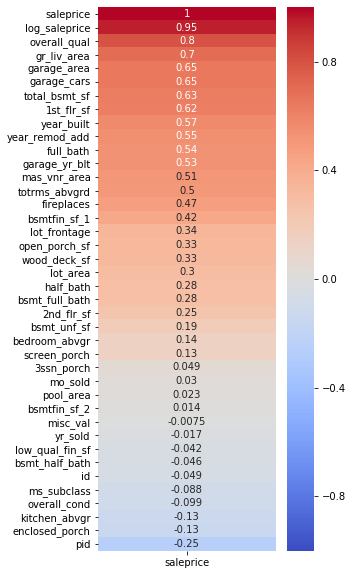

In [136]:
plt.figure(figsize=(4,10))
sns.heatmap(df_train.corr()[['saleprice',
#                              'garage_cars',
#                              'gr_liv_area',
#                              'total_bsmt_sf',
#                              'log_saleprice'
                            ]].sort_values(by='saleprice', ascending = False), 
            cmap = 'coolwarm', 
            vmin = -1,
            annot = True,
           );

#### 1.9.2 Pairplot for Selected Features:

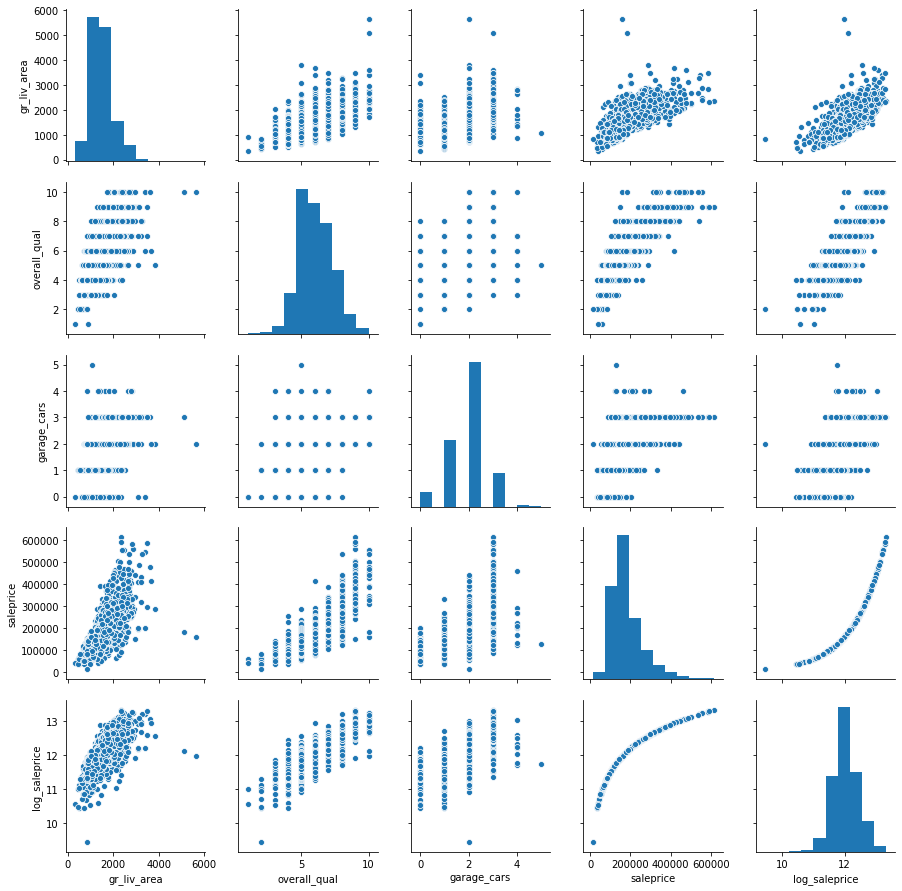

In [137]:
pair_features = [

                 'gr_liv_area',
                 'overall_qual',
#                  'garage_area',
                 'garage_cars',
                 'saleprice',
                 'log_saleprice'
                ]
sns.pairplot(df_train, y_vars = pair_features, x_vars = pair_features);

#### 1.9.3 Boxplot for Selected Features: for Outliers

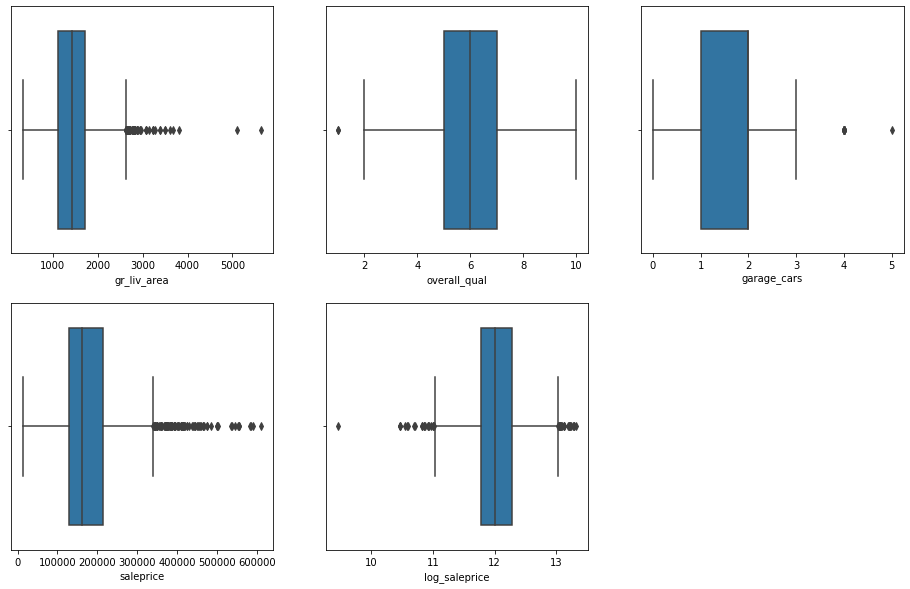

In [138]:
plt.figure(figsize=(16,10))
for i in range(len(pair_features)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df_train[pair_features[i]]);

#### 1.9.4 Histagram for All Numerical Features:

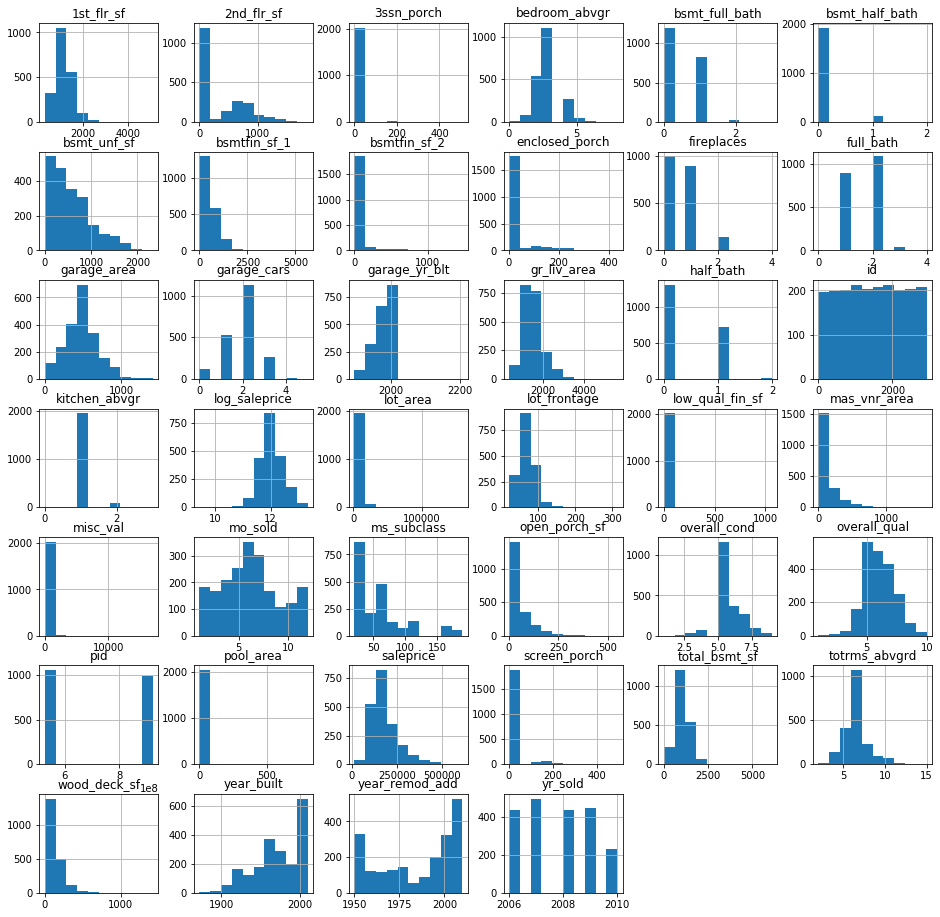

In [139]:
# Training Data
df_train.hist(figsize=(16,16));

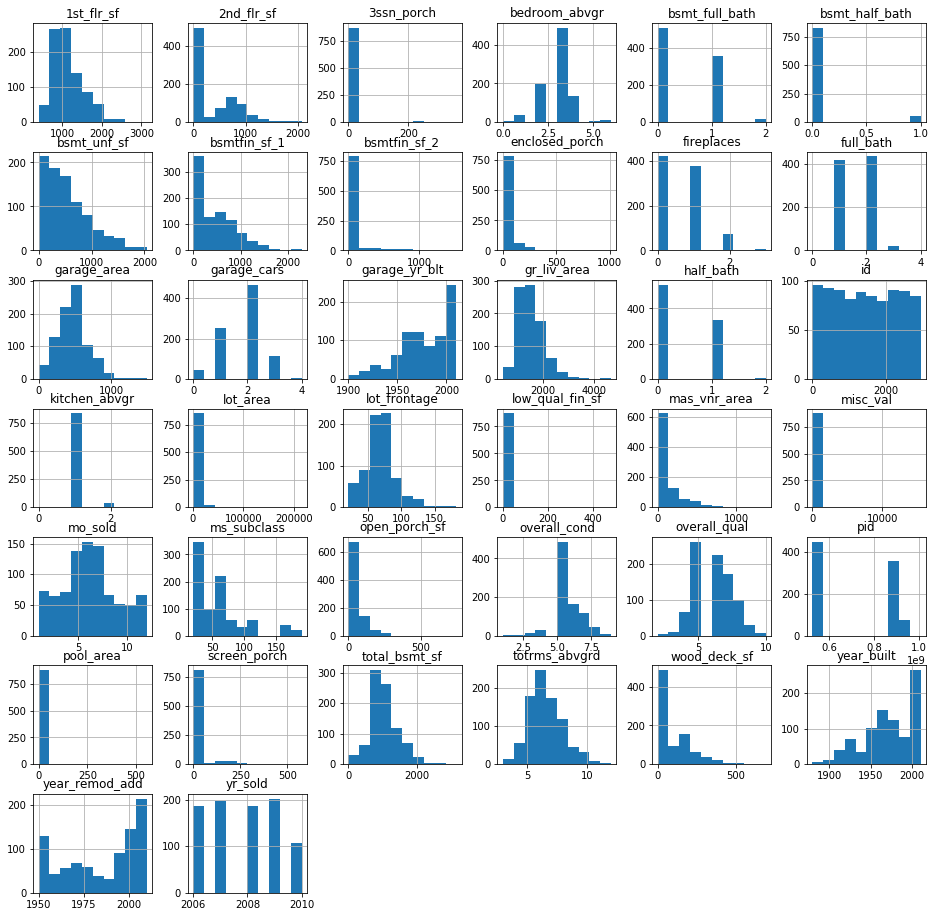

In [140]:
# Testing Data
df_test.hist(figsize=(16,16));

### 1.10 Data Transformation Proposal

1. Log transform the 'saleprice'.
2. Log transform the 'lot_area'.
3. Cubic root transform the 'gr_liv_area'.

In [141]:
def plot_hist(df, feat, power):
    plt.figure(figsize = (18,5))
    # original data
    plt.subplot(131)
    df[feat].hist()
    plt.title(f'{feat}: No Transformation')
    # log transformation
    plt.subplot(132)
    np.log(df[feat]).hist()
    plt.title(f'{feat}: Log Transformation')
    # power transformation
    plt.subplot(133)
    (df[feat]**(1/power)).hist()
    plt.title(f'{feat}: Power (1/{power}) Transformation');

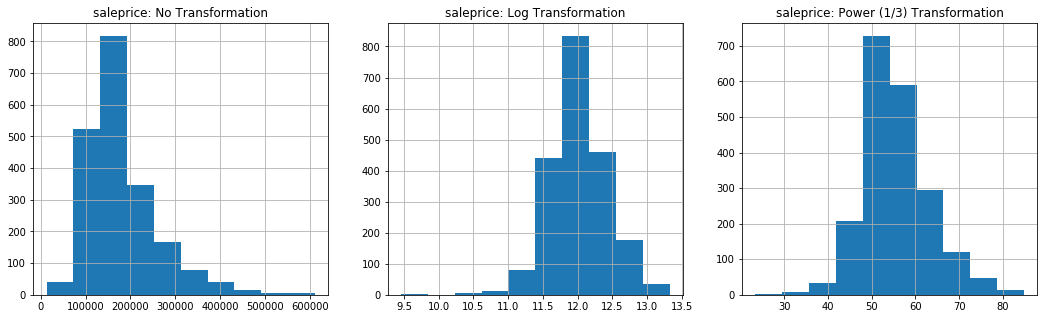

In [142]:
# Plot histagram for no, log, and cubic root transformation for 'saleprice'
plot_hist(df_train, 'saleprice', 3)

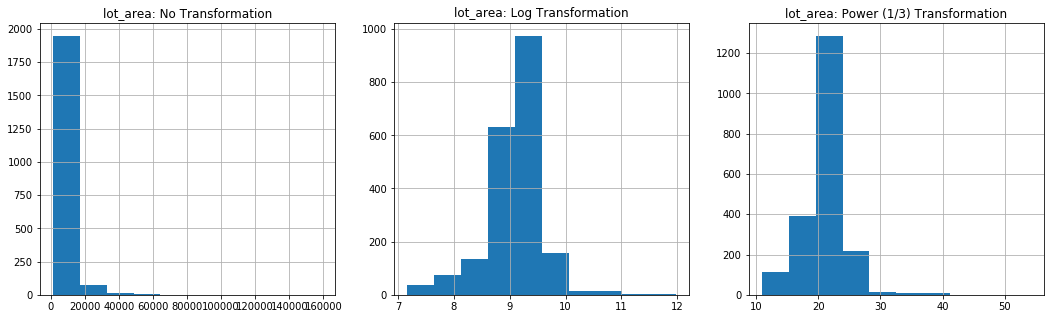

In [143]:
# Plot histagram for no, log, and cubic root transformation for 'lot_area'
plot_hist(df_train, 'lot_area', 3)

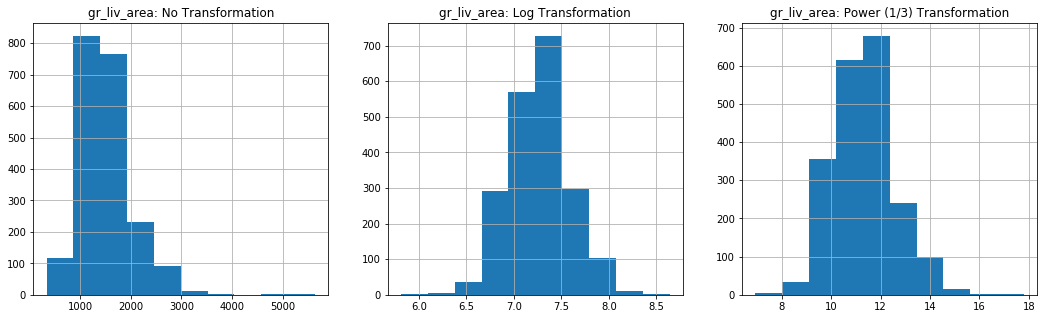

In [144]:
# Plot histagram for no, log, and cubic root transformation for 'gr_liv_area'
plot_hist(df_train, 'gr_liv_area', 3)

### 1.10 Remove Outliers

> ID 958 and 1879 are big properties but sold for very low price.

> Based on the model iteration, addition outliers were removed in this section

In [145]:
# Check shape before removing outliers
df_train.shape

(2044, 82)

In [146]:
# Remove outliers from the pairplot above
df_train.drop([958,1879], inplace = True)

In [147]:
# Reset Index
df_train = df_train.reset_index(drop=True)

In [148]:
# Outlier identified to drop based on the model iteration #2
id_to_del = [#1889,1665,125,347,1789,1133,1032,151,1956,
             0, 125, 151, 160, 200, 344, 347, 377, 470, 479, 
             488, 507, 621, 637, 680, 986, 1032, 1033, 1133, 1138, 
             1139, 1154, 1197, 1245, 1250, 1453, 1455, 1498, 1532, 1555, 
             1606, 1665, 1686, 1689, 1751, 1764, 1777, 1789, 1889, 1921, 1956          
            ]
df_train.drop(id_to_del, inplace = True)
# # df_train.iloc[id_to,:]

In [149]:
#Reset Index
df_train = df_train.reset_index(drop=True)

In [150]:
# Check shape after removing outliers
df_train.shape

(2001, 82)

In [151]:
# Confirm the hape of the testing data
df_test.shape

(879, 80)

### 1.11 Store Cleaned Data for Part 2

In [152]:
%store df_train
%store df_test

Stored 'df_train' (DataFrame)
Stored 'df_test' (DataFrame)
